In [28]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [76]:
#Parameters
p = 0.5 #Initial frequency of defender allele
q = (1 - p) #Frequency of non defenders
C = 10 #Number of eggs laid by non defender females
c = 5 #Number of eggs laid by defender females
a = 1.5 #Advantage for non defender mails in mating rate
u = 0.3 #Probability female stays unmated
r = 0.5 #Sex ration (Prob of male larvae in a mating)

def s(d): #Probability of the group surviving based on the proportion of defenders in the larvae
    return (np.exp(-d) - np.exp(0))/(np.exp(-1) - np.exp(0)) #For now we are using linear distribution

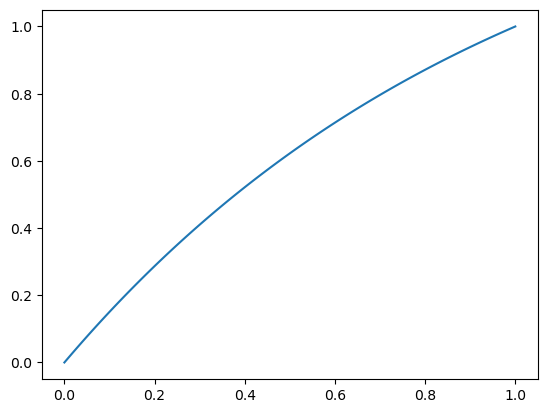

In [77]:
d = np.linspace(0, 1, 101)
plt.plot(d, s(d))

In [33]:
#Aux Functions
def comb(n, r):
    return math.factorial(n) / (math.factorial(n-r) * math.factorial(r))

In [27]:
#Initial frequencies of all genotypes
#Males
x0 = q
x1 = p

y0 = a*x0 / (a*x0 + x1)
y1 = x1 / (a*x0 + x1)

#Females (Assuming equilibrium values)
x00 = q*q
x01 = 2*p*q
x11 = p*p

In [ ]:
#Non matings
def f00_x0(u, x00, C):
    return u * x00 * C * s(0)

def f01_x0x1(u, x01, C):
    S = 0
    for k in range(C+1):
        S += comb(C, k) * ((0.5)**(k)*(0.5)**(C-k)) * s(k/C)

    return u * x01 * C * S

def f11_x1(u, x11, c):
    return u * x11 * c * s(1)

#Matings
def f00m0_x00x0(u, x00, y0, C):
    return (1-u) * x00 * y0 * C * s(0)

def f11m1_x11x1(u, x11, y1, c):
    return (1-u) * x11 * y1 * c * s(1)

def f00m1_x01x0(u, x00, y1, C):
    return (1-u) * x00 * y1 * C * s(0)

def f11m0_x01x1(u, x11, y0, c, r):
    S = 0
    for k in range(c+1):
        S += comb(c, k) * ((r)**(k)*(1-r)**(c-k)) * s(k/c)

    return (1-u) * x11 * y0 * c * S

def f01m0_x01x00x1x0(u, x01, y0, C, r):
    S = 0
    for k in range(C+1):
        for m in range(k+1):
            for f in range(C-k+1):
                S += comb(C, k) * ((r)**(k)*(1-r)**(C-k)) * comb(k, m) * (2 ** -k) * comb(C-k, f) * (2 ** k-C) * s(m/C)

    return (1-u) * x01 * y0 * C * S

def f01m1_x01x11x1x0(u, x01, y1, C, r):
    S = 0
    for k in range(C+1):
        for m in range(k+1):
            for f in range(C-k+1):
                S += comb(C, k) * ((r)**(k)*(1-r)**(C-k)) * comb(k, m) * (2 ** -k) * comb(C-k, f) * (2 ** k-C) * s((f+m)/C)

    return (1-u) * x01 * y1 * C * S

In [78]:
t = 100
S = 0
r = 0.5
for k in range(t+1):
    S += comb(t, k) * ((r)**(k)*(1-r)**(t-k)) * s(k/t)

print(S)


0.6212591895505835
